In [ ]:
# installing and importing
print("Installing scikit-image")
!pip install scikit-image -q

print("Importing all necessary libraries")
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files # For uploading
import zipfile # For unzipping

from skimage import io, color, filters, exposure
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 3 Classifiers - Banner ID (9309- 2: Decision Tree, 3: Neural Network, 5 : AdaBoost)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# Classifier for Task 7
from sklearn.svm import LinearSVC

print("\nSuccess!")

Installing scikit-image
Importing all necessary libraries

Success!


In [ ]:
# uploading dataset
print("Upload your 'New_Dataset.zip' file.")
uploaded = files.upload()

# Getting the name of the file
zip_name = list(uploaded.keys())[0]

# Unzipping the file
print(f"Unzipping '{zip_name}'...")
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall('dataset')

print("Dataset is uploaded and unzipped successfully!")

Upload your 'New_Dataset.zip' file.


Saving New_Dataset.zip to New_Dataset (1).zip
Unzipping 'New_Dataset (1).zip'...
Dataset is uploaded and unzipped successfully!


In [ ]:
# Turning images into a number dataset
data_dir = "dataset/New_Dataset"
classes = sorted(os.listdir(data_dir))
print(f"Classes found: {classes}")

# Defining the 'angle' function
def angle(dx, dy):
    """Angles between horizontal and vertical Sobel operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

print("Generating Edge Histogram dataset...")
all_histograms = []
labels = []

# Using 'enumerate' to get numeric labels (0, 1, 2, 3)
for i, cls in enumerate(classes):
    folder = os.path.join(data_dir, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = io.imread(img_path)
        gray = color.rgb2gray(img) if img.ndim == 3 else img

        angle_sobel = angle(filters.sobel_h(gray), filters.sobel_v(gray))
        hist, _ = exposure.histogram(angle_sobel, nbins=36)

        all_histograms.append(hist)
        labels.append(i) # Use the numeric label 'i'

# X = features, y = labels
X = np.array(all_histograms)
y = np.array(labels)

print(f"\nDataset created successfully!")
print(f"X shape (features): {X.shape}")
print(f"y shape (labels): {y.shape}")

Classes found: ['buildings', 'forest', 'glacier', 'sea']
Generating Edge Histogram dataset...

Dataset created successfully!
X shape (features): (400, 36)
y shape (labels): (400,)


In [ ]:
# Splitting the dataset (80/20, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

print(f"  Training set has {X_train.shape[0]} images.")
print(f"  Test set has {X_test.shape[0]} images.")

# Standardizing the training dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print("\n  Training data standardized.")

# Standardizing the test dataset
X_test_scaled = scaler.transform(X_test)
print("  Test data standardized.")

  Training set has 320 images.
  Test set has 80 images.

  Training data standardized.
  Test data standardized.


Processing: Decision Tree
  5-Fold CV Accuracies: [0.703125 0.65625  0.703125 0.78125  0.71875 ]
  Mean CV Accuracy: 0.7125
  Model trained on full training set
  Test Set Accuracy: 0.7375
  Test Set F-measure (Weighted): 0.7347
Processing: Neural Network


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

  5-Fold CV Accuracies: [0.6875   0.765625 0.84375  0.890625 0.78125 ]
  Mean CV Accuracy: 0.7937


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


  Model trained on full training set
  Test Set Accuracy: 0.8125
  Test Set F-measure (Weighted): 0.8073
Processing: Adaboost
  5-Fold CV Accuracies: [0.6875   0.734375 0.78125  0.71875  0.796875]
  Mean CV Accuracy: 0.7438
  Model trained on full training set
  Test Set Accuracy: 0.8125
  Test Set F-measure (Weighted): 0.8030
Plotting 3 Confusion Matrices Side-by-Side...


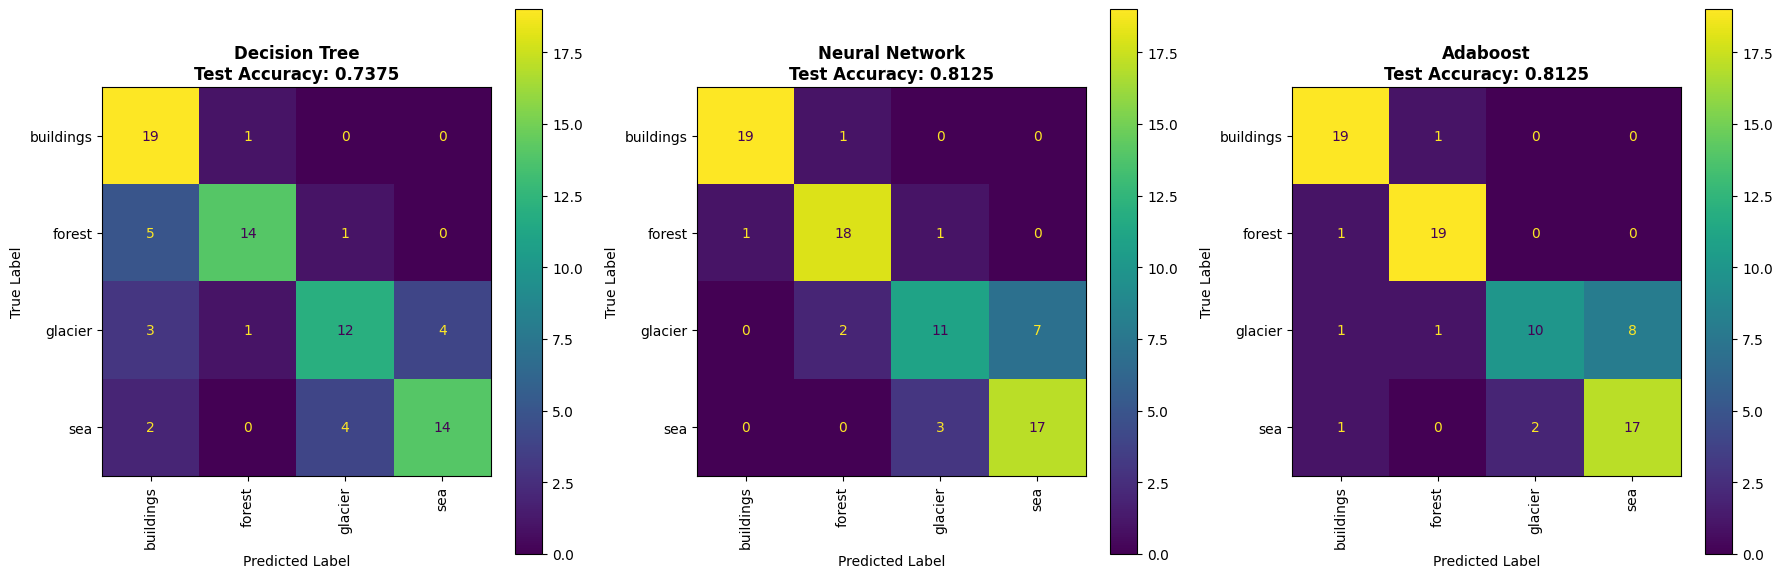

In [ ]:
# TASK 6: Performance Comparison
# Performing stratified 5-fold cross-validation using three classification methods ()
# Banner ID ends with 9309	classifiers:  2- Decision Tree,	3- Neural Network,	5- Adaboost


# Defining the 3 assigned classifiers with specified parameters
classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42)
}
# Though I got warning "Maximum iterations (200) reached and the optimization hasn't converged yet", I kept it default


# Dictionary to store all results
results = {}

# Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Looping over each classifier
for name, clf in classifiers.items():
    print(f"Processing: {name}")
    print(f"{'='*70}")

    # 1. Performing 5-fold cross-validation on training set
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    mean_cv_accuracy = np.mean(cv_scores)
    print(f"  5-Fold CV Accuracies: {cv_scores}")
    print(f"  Mean CV Accuracy: {mean_cv_accuracy:.4f}")

    # 2. Training on full training set
    clf.fit(X_train_scaled, y_train)
    print(f"  Model trained on full training set")

    # 3. Predict on test set
    y_pred = clf.predict(X_test_scaled)

    # 4. Calculating metrics on test set
    test_accuracy = accuracy_score(y_test, y_pred)
    test_fmeasure = f1_score(y_test, y_pred, average='weighted')
    print(f"  Test Set Accuracy: {test_accuracy:.4f}")
    print(f"  Test Set F-measure (Weighted): {test_fmeasure:.4f}")

    # Storing results including predictions for confusion matrix
    results[name] = {
        "mean_cv_accuracy": mean_cv_accuracy,
        "test_accuracy": test_accuracy,
        "test_fmeasure": test_fmeasure,
        "y_pred": y_pred
    }

# REFERENCES:
# [1] Scikit-learn ConfusionMatrixDisplay documentation
#     https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
#     Used for: Creating and displaying confusion matrices
# [2] Matplotlib subplots documentation
#     https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
#     Used for: Creating multiple subplots in one figure (side-by-side layout)


print("Plotting 3 Confusion Matrices Side-by-Side...")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (name, result) in enumerate(results.items()):
    y_pred = result["y_pred"]
    cm = confusion_matrix(y_test, y_pred)

    # Creating confusion matrix display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(ax=axes[idx], xticks_rotation='vertical', colorbar=True, cmap='viridis')

    # Setting title with classifier name and test accuracy
    axes[idx].set_title(f'{name}\nTest Accuracy: {result["test_accuracy"]:.4f}',
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontsize=10)
    axes[idx].set_ylabel('True Label', fontsize=10)

plt.tight_layout()
plt.savefig('confusion_matrices_task6.png', dpi=300, bbox_inches='tight')
plt.show()


1. **By Visual Comparison:**

Best Method: Neural Network & Adaboost are tied for the best.

Why: Visually, the diagonal cells for both the Neural Network (19, 18, 11, 17) and Adaboost (19, 19, 10, 17) are much brighter than the Decision Tree's diagonal (19, 14, 12, 14). Both Neural Network and Adaboost have test accuracy of 0.8125 (65/80 correct), while Decision Tree has 0.7375 (59/80 correct). The off-diagonal cells for both Neural Network and Adaboost are much darker than the Decision Tree has several noticeable errors, like misclassifying 5 forest images as buildings. Neural Network demonstrates slightly more balanced performance than adaboost across classes.

2. **By Mean CV Accuracy:**

Best Method: Neural Network.

Why: The Neural Network achieved the highest Mean CV Accuracy of 0.7937. This is quantifiably better than Adaboost's score of 0.7438 and the Decision Tree's score of 0.7125.

3. **By Test Set Accuracy:**

Best Method: Neural Network & Adaboost are tied.

Why: Both models achieved an identical Test Set Accuracy of 0.8125. This score is significantly higher than the Decision Tree's accuracy of 0.7375.

4. **By Test Set F-measure:**

Best Method: Neural Network.

Why: The Neural Network had the highest Test Set F-measure of 0.8073. This score is slightly better than Adaboost's 0.8030 and much better than the Decision Tree's 0.7347.

In [ ]:
#Task 7: Model Selection (LinearSVC)


# Choosing two classes
class_A_index = 0  # buildings
class_B_index = 1  # forest

chosen_indices = [class_A_index, class_B_index]
class_names_2class = [classes[class_A_index], classes[class_B_index]]
print(f"\nUsing two classes: '{class_names_2class[0]}' vs '{class_names_2class[1]}'")

# Filter TRAINING data for these two classes
train_mask = np.isin(y_train, chosen_indices)
X_train_2class = X_train_scaled[train_mask]
y_train_2class = y_train[train_mask]
print(f"  2-Class Training Set: {X_train_2class.shape[0]} samples")

# Filter TEST data for these two classes
test_mask = np.isin(y_test, chosen_indices)
X_test_2class = X_test_scaled[test_mask]
y_test_2class = y_test[test_mask]
print(f"  2-Class Test Set: {X_test_2class.shape[0]} samples")

# Verify class distribution
unique_train, counts_train = np.unique(y_train_2class, return_counts=True)
unique_test, counts_test = np.unique(y_test_2class, return_counts=True)
print(f"\n  Training set distribution: {dict(zip(unique_train, counts_train))}")
print(f"  Test set distribution: {dict(zip(unique_test, counts_test))}")


Using two classes: 'buildings' vs 'forest'
  2-Class Training Set: 160 samples
  2-Class Test Set: 40 samples

  Training set distribution: {np.int64(0): np.int64(80), np.int64(1): np.int64(80)}
  Test set distribution: {np.int64(0): np.int64(20), np.int64(1): np.int64(20)}



1. Stratified 5-Fold Cross-Validation:
   C=  0.1: Train Error=  3.91%, Val Error=  6.25%
   C=    1: Train Error=  0.62%, Val Error=  6.87%
   C=   10: Train Error=  0.00%, Val Error=  7.50%
   C=  100: Train Error=  0.00%, Val Error=  8.13%

2. Standard 5-Fold Cross-Validation:
   C=  0.1: Train Error=  4.37%, Val Error=  5.63%
   C=    1: Train Error=  0.62%, Val Error=  4.37%
   C=   10: Train Error=  0.00%, Val Error=  6.25%
   C=  100: Train Error=  0.00%, Val Error=  6.25%

 Plotting Error Curves...
----------------------------------------------------------------------


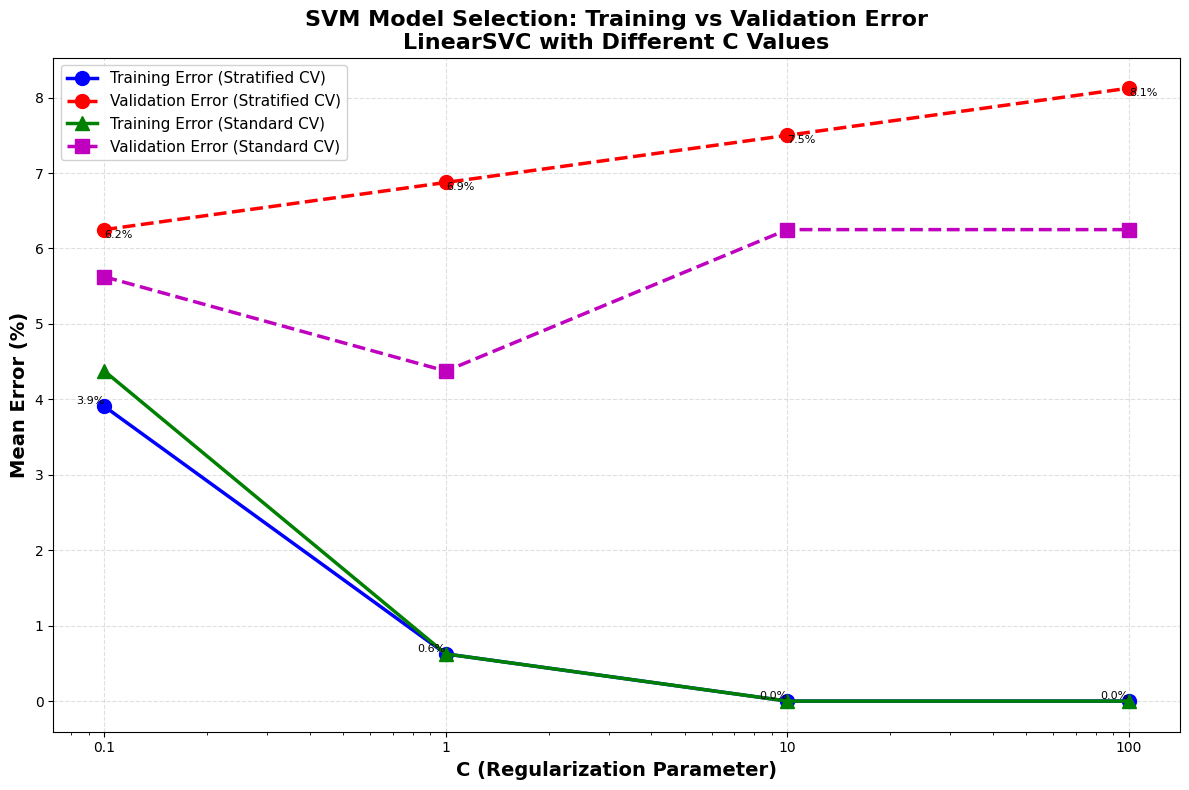


SUMMARY: Lowest Mean Errors for Each Curve

Stratified Cross-Validation:
  Lowest Training Error:   0.00% at C=10
  Lowest Validation Error: 6.25% at C=0.1

Standard Cross-Validation:
  Lowest Training Error:   0.00% at C=10
  Lowest Validation Error: 4.37% at C=1


In [ ]:
# Cross-Validation and Plot Error Curves
C_values = [0.1, 1, 10, 100]

# Storage for results
train_errors_stratified = []
val_errors_stratified = []
train_errors_standard = []
val_errors_standard = []


# STRATIFIED 5-Fold Cross-Validation
print("\n1. Stratified 5-Fold Cross-Validation:")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for c in C_values:
    clf = LinearSVC(C=c, max_iter=5000, random_state=42, dual="auto")
    cv_results = cross_validate(
        clf, X_train_2class, y_train_2class,
        cv=skf,
        return_train_score=True,
        scoring='accuracy'
    )

    # Calculating errors (Error = 1 - Accuracy)
    train_error = (1 - np.mean(cv_results['train_score'])) * 100
    val_error = (1 - np.mean(cv_results['test_score'])) * 100

    train_errors_stratified.append(train_error)
    val_errors_stratified.append(val_error)

    print(f"   C={c:>5}: Train Error={train_error:6.2f}%, Val Error={val_error:6.2f}%")

# STANDARD 5-Fold Cross-Validation
print("\n2. Standard 5-Fold Cross-Validation:")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for c in C_values:
    clf = LinearSVC(C=c, max_iter=5000, random_state=42, dual="auto")
    cv_results = cross_validate(
        clf, X_train_2class, y_train_2class,
        cv=kf,
        return_train_score=True,
        scoring='accuracy'
    )

    train_error = (1 - np.mean(cv_results['train_score'])) * 100
    val_error = (1 - np.mean(cv_results['test_score'])) * 100

    train_errors_standard.append(train_error)
    val_errors_standard.append(val_error)

    print(f"   C={c:>5}: Train Error={train_error:6.2f}%, Val Error={val_error:6.2f}%")

# PLOTTING ERROR CURVES

print("\n Plotting Error Curves...")
print("-"*70)

plt.figure(figsize=(12, 8))

# Plotting all four curves
plt.plot(C_values, train_errors_stratified, 'bo-', linewidth=2.5, markersize=10,
         label='Training Error (Stratified CV)')
plt.plot(C_values, val_errors_stratified, 'ro--', linewidth=2.5, markersize=10,
         label='Validation Error (Stratified CV)')
plt.plot(C_values, train_errors_standard, 'g^-', linewidth=2.5, markersize=10,
         label='Training Error (Standard CV)')
plt.plot(C_values, val_errors_standard, 'ms--', linewidth=2.5, markersize=10,
         label='Validation Error (Standard CV)')

# Formatting
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Error (%)', fontsize=14, fontweight='bold')
plt.title('SVM Model Selection: Training vs Validation Error\nLinearSVC with Different C Values',
          fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.4, linestyle='--')
plt.xticks(C_values, [f'{c}' for c in C_values])

# Adding value labels on points
for i, c in enumerate(C_values):
    plt.text(c, train_errors_stratified[i], f'{train_errors_stratified[i]:.1f}%',
             fontsize=8, ha='right', va='bottom')
    plt.text(c, val_errors_stratified[i], f'{val_errors_stratified[i]:.1f}%',
             fontsize=8, ha='left', va='top')

plt.tight_layout()
plt.savefig('task7_error_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# SUMMARY OF RESULTS
print("\n" + "="*70)
print("SUMMARY: Lowest Mean Errors for Each Curve")
print("="*70)

print("\nStratified Cross-Validation:")
print(f"  Lowest Training Error:   {np.min(train_errors_stratified):.2f}% at C={C_values[np.argmin(train_errors_stratified)]}")
print(f"  Lowest Validation Error: {np.min(val_errors_stratified):.2f}% at C={C_values[np.argmin(val_errors_stratified)]}")

print("\nStandard Cross-Validation:")
print(f"  Lowest Training Error:   {np.min(train_errors_standard):.2f}% at C={C_values[np.argmin(train_errors_standard)]}")
print(f"  Lowest Validation Error: {np.min(val_errors_standard):.2f}% at C={C_values[np.argmin(val_errors_standard)]}")


1. **Lowest Mean Errors for Each Curve**

Stratified Cross-Validation:

Lowest Training Error: 0.00% at C=10 (and C=100)

Lowest Validation Error: 6.25% at C=0.1

Standard Cross-Validation:

Lowest Training Error: 0.00% at C=10 (and C=100)

Lowest Validation Error: 4.37% at C=1


2. **Model Complexity in Relation to C**
The parameter C controls regularization strength in SVM:

Small C (0.1): Strong regularization → Simpler model → Wider margin, allows more errors

Large C (100): Weak regularization → More complex model → Narrow margin, fits training data tightly

From results: As C increases from 0.1 to 100, training error decreases from 3.91% to 0.00%. This confirms that larger C creates more complex models that fit training data better.

3. **Overfitting/Underfitting Analysis**

C= 0.1 Gap= 2.34% (Slight underfitting)

C= 1 Gap: 6.25% (Beginning overfitting)

C= 10 Gap= 7.50% (Overfitting)

C=100 Gap= 8.13% (Severe overfitting)

Classic overfitting pattern observed. As C increases, the model becomes too complex and overfits.

In [ ]:
# Test Set Evaluation with Best C

print("TEST SET EVALUATION")
print("-"*70)

# Finding the best C from STRATIFIED cross-validation
best_c_index = np.argmin(val_errors_stratified)
best_C = C_values[best_c_index]
print(f"\nBest C from Stratified CV: {best_C}")
print(f"  (Had lowest validation error of {val_errors_stratified[best_c_index]:.2f}%)")

# Training final model on ENTIRE 2-class training set
print(f"\nTraining final LinearSVC with C={best_C} on full 2-class training set")
final_svm = LinearSVC(C=best_C, max_iter=5000, random_state=42, dual="auto")
final_svm.fit(X_train_2class, y_train_2class)

# Evaluating on 2-class TEST set
y_pred_test = final_svm.predict(X_test_2class)
test_accuracy = accuracy_score(y_test_2class, y_pred_test)
test_error = (1 - test_accuracy) * 100

print("\n")
print(f"FINAL TEST SET ERROR: {test_error:.2f}%")
print(f"FINAL TEST SET ACCURACY: {test_accuracy:.4f}")


TEST SET EVALUATION
----------------------------------------------------------------------

Best C from Stratified CV: 0.1
  (Had lowest validation error of 6.25%)

Training final LinearSVC with C=0.1 on full 2-class training set


FINAL TEST SET ERROR: 2.50%
FINAL TEST SET ACCURACY: 0.9750


**Test Set Error:**

Using C=0.1 (lowest validation error from stratified 5-fold cross-validation), the test set error is 2.50%.